In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_new = pd.read_csv(r"df_with_formtext.csv")
df_new.head()

,Unnamed: 0,companyName,CIK,filedDate,url,realfiledDate,form_text
0,0,"Avangard Capital Group, Inc",1561092,2014-01-03,/Archives/edgar/data/1561092/00014931521400000...,2014-01-03,\n\n \n\n \n \nUNITED\nSTATES\nSECURITIES\nA...
1,1,"Avangard Capital Group, Inc",1561092,2014-07-25,/Archives/edgar/data/1561092/00014931521400228...,2014-07-25,\n\n \n\n \n \nUNITED\nSTATES\nSECURITIES\nA...
2,2,"Avangard Capital Group, Inc",1561092,2014-01-03,/Archives/edgar/data/1561092/00014931521400000...,2014-01-03,\n\n \n\n \n \nUNITED\nSTATES\nSECURITIES\nA...
3,3,"Avangard Capital Group, Inc",1561092,2014-07-25,/Archives/edgar/data/1561092/00014931521400228...,2014-07-25,\n\n \n\n \n \nUNITED\nSTATES\nSECURITIES\nA...
4,4,"Avangard Capital Group, Inc",1561092,2014-07-25,/Archives/edgar/data/1561092/00014931521400228...,2014-07-25,\n\n \n\n \n \nUNITED\nSTATES\nSECURITIES\nA...


In [3]:
len(df_new["form_text"])

355812

## This is the problem, they are the same word for word

In [4]:
df_new["form_text"][0] == df_new["form_text"][10000]

True

## Ya why sia so weird - Jackie

In [5]:
df_new.iloc[0]

Unnamed: 0                                                       0
companyName                            Avangard Capital Group, Inc
CIK                                                        1561092
filedDate                                               2014-01-03
url              /Archives/edgar/data/1561092/00014931521400000...
realfiledDate                                           2014-01-03
form_text        \n\n \n\n \n   \nUNITED\nSTATES\nSECURITIES\nA...
Name: 0, dtype: object

In [6]:
df_new.iloc[10000]

Unnamed: 0                                                   10000
companyName                                   E-Debit Global Corp.
CIK                                                        1129120
filedDate                                               2017-11-02
url              /Archives/edgar/data/1129120/00010659491700013...
realfiledDate                                           2017-11-02
form_text        \n\n \n\n \n   \nUNITED\nSTATES\nSECURITIES\nA...
Name: 10000, dtype: object

In [7]:
df_new["form_text"][12121]

'\n\n\xa0\n\n\xa0\n\xa0\xa0\xa0\nUNITED\nSTATES\nSECURITIES\nAND EXCHANGE COMMISSION\nWashington,\nDC 20549\n\xa0\nFORM\n8-K\n\xa0\nCURRENT\nREPORT\n\xa0\nPursuant\nto Section 13 OR 15(d) of The Securities Exchange Act of 1934\n\xa0\nDate\nof Report (Date of earliest event reported): December 31, 2013\n\xa0\n\n\nAVANGARD\n    CAPITAL GROUP INC.\n\n(Exact\n    name of registrant as specified in its charter)\n\n\xa0\n\n\nNevada\n\xa0\n333-184682\n\xa0\n45-5507359\n\n(State\n    or other jurisdiction\n\xa0\n(Commission\n\xa0\n(IRS\n    Employer\n\nof\n    incorporation)\n\xa0\nFile\n    Number)\n\xa0\nIdentification\n    No.)\n\n\xa0\n\n\n2708\n    Commerce Way Suite 300, Philadelphia PA\n\xa0\n19154\n    \n\n(Address\n    of principal executive offices)\n\xa0\n(Zip\n    Code)\n\n\xa0\xa0\nRegistrant’s\ntelephone number, including area code: (215) 464-7300\n\xa0\n\n\nNot\n    applicable.\n\n(Former\n    name or former address, if changed since last report)\n\n\xa0\nCheck\nthe appropriate 

In [8]:
 df_new["form_text"][10000]

'\n\n\xa0\n\n\xa0\n\xa0\xa0\xa0\nUNITED\nSTATES\nSECURITIES\nAND EXCHANGE COMMISSION\nWashington,\nDC 20549\n\xa0\nFORM\n8-K\n\xa0\nCURRENT\nREPORT\n\xa0\nPursuant\nto Section 13 OR 15(d) of The Securities Exchange Act of 1934\n\xa0\nDate\nof Report (Date of earliest event reported): December 31, 2013\n\xa0\n\n\nAVANGARD\n    CAPITAL GROUP INC.\n\n(Exact\n    name of registrant as specified in its charter)\n\n\xa0\n\n\nNevada\n\xa0\n333-184682\n\xa0\n45-5507359\n\n(State\n    or other jurisdiction\n\xa0\n(Commission\n\xa0\n(IRS\n    Employer\n\nof\n    incorporation)\n\xa0\nFile\n    Number)\n\xa0\nIdentification\n    No.)\n\n\xa0\n\n\n2708\n    Commerce Way Suite 300, Philadelphia PA\n\xa0\n19154\n    \n\n(Address\n    of principal executive offices)\n\xa0\n(Zip\n    Code)\n\n\xa0\xa0\nRegistrant’s\ntelephone number, including area code: (215) 464-7300\n\xa0\n\n\nNot\n    applicable.\n\n(Former\n    name or former address, if changed since last report)\n\n\xa0\nCheck\nthe appropriate 

In [9]:
 df_new["form_text"][1000]

'\n\n\xa0\n\n\xa0\n\xa0\xa0\xa0\nUNITED\nSTATES\nSECURITIES\nAND EXCHANGE COMMISSION\nWashington,\nDC 20549\n\xa0\nFORM\n8-K\n\xa0\nCURRENT\nREPORT\n\xa0\nPursuant\nto Section 13 OR 15(d) of The Securities Exchange Act of 1934\n\xa0\nDate\nof Report (Date of earliest event reported): December 31, 2013\n\xa0\n\n\nAVANGARD\n    CAPITAL GROUP INC.\n\n(Exact\n    name of registrant as specified in its charter)\n\n\xa0\n\n\nNevada\n\xa0\n333-184682\n\xa0\n45-5507359\n\n(State\n    or other jurisdiction\n\xa0\n(Commission\n\xa0\n(IRS\n    Employer\n\nof\n    incorporation)\n\xa0\nFile\n    Number)\n\xa0\nIdentification\n    No.)\n\n\xa0\n\n\n2708\n    Commerce Way Suite 300, Philadelphia PA\n\xa0\n19154\n    \n\n(Address\n    of principal executive offices)\n\xa0\n(Zip\n    Code)\n\n\xa0\xa0\nRegistrant’s\ntelephone number, including area code: (215) 464-7300\n\xa0\n\n\nNot\n    applicable.\n\n(Former\n    name or former address, if changed since last report)\n\n\xa0\nCheck\nthe appropriate 

## Time to fix this

In [10]:
for i in df_new['url'][:20]:
    print(i)

/Archives/edgar/data/1561092/000149315214000002/form8k.htm
/Archives/edgar/data/1561092/000149315214002281/form8k.htm
/Archives/edgar/data/1561092/000149315214000002/form8k.htm
/Archives/edgar/data/1561092/000149315214002281/form8k.htm
/Archives/edgar/data/1561092/000149315214002281/form8k.htm
/Archives/edgar/data/1561092/000149315214000002/form8k.htm
/Archives/edgar/data/1561092/000149315214000002/form8k.htm
/Archives/edgar/data/1561092/000149315214000002/form8k.htm
/Archives/edgar/data/1561092/000149315214002281/form8k.htm
/Archives/edgar/data/1561092/000149315214002281/form8k.htm
/Archives/edgar/data/1561092/000149315214002281/form8k.htm
/Archives/edgar/data/1561092/000149315214000002/form8k.htm
/Archives/edgar/data/1373561/000119312517090824/d364929d8k.htm
/Archives/edgar/data/1373561/000119312517173405/d391115d8k.htm
/Archives/edgar/data/1373561/000156459017005167/news-8k_20170320.htm
/Archives/edgar/data/1373561/000119312517311352/d476233d8k.htm
/Archives/edgar/data/1373561/00015

In [11]:
for i in df_new['filedDate'][:20]:
    print(i)

2014-01-03
2014-07-25
2014-01-03
2014-07-25
2014-07-25
2014-01-03
2014-01-03
2014-01-03
2014-07-25
2014-07-25
2014-07-25
2014-01-03
2017-03-21
2017-05-17
2017-03-23
2017-10-17
2017-05-03
2017-10-20
2017-02-14
2016-12-09


In [12]:
 df_new["url"][1000]

'/Archives/edgar/data/1124127/000158069514000498/mint8k102714.htm'

In [13]:
df_new["url"].value_counts()

/Archives/edgar/data/873860/000149315217015084/form8-k.htm                       82
/Archives/edgar/data/873860/000149315218002615/form8-k.htm                       82
/Archives/edgar/data/1362180/000143774914022296/psmh20141218_8k.htm              82
/Archives/edgar/data/873860/000149315218003766/form8-k.htm                       82
/Archives/edgar/data/873860/000149315218001367/form8-k.htm                       82
                                                                                 ..
/Archives/edgar/data/767405/000121390018014137/f8k101718b_sbfinancial.htm         5
/Archives/edgar/data/767405/000121390018001280/f8k020518_sbfinancialgroup.htm     5
/Archives/edgar/data/767405/000121390018006483/f8k051618_sbfinancial.htm          5
/Archives/edgar/data/1743886/000119312519085089/d724123d8k.htm                    3
/Archives/edgar/data/1487427/000148742717000005/axs8-k.htm                        2
Name: url, Length: 9019, dtype: int64

## Time to get the correct text

In [14]:
from bs4 import BeautifulSoup
import requests
import time

base_url = "https://www.sec.gov"

for i in df_new['url'][:10]:
    print(base_url + i)

https://www.sec.gov/Archives/edgar/data/1561092/000149315214000002/form8k.htm
https://www.sec.gov/Archives/edgar/data/1561092/000149315214002281/form8k.htm
https://www.sec.gov/Archives/edgar/data/1561092/000149315214000002/form8k.htm
https://www.sec.gov/Archives/edgar/data/1561092/000149315214002281/form8k.htm
https://www.sec.gov/Archives/edgar/data/1561092/000149315214002281/form8k.htm
https://www.sec.gov/Archives/edgar/data/1561092/000149315214000002/form8k.htm
https://www.sec.gov/Archives/edgar/data/1561092/000149315214000002/form8k.htm
https://www.sec.gov/Archives/edgar/data/1561092/000149315214000002/form8k.htm
https://www.sec.gov/Archives/edgar/data/1561092/000149315214002281/form8k.htm
https://www.sec.gov/Archives/edgar/data/1561092/000149315214002281/form8k.htm


In [15]:
df_new_dropdup = df_new.drop_duplicates(subset='url')

In [16]:
len(df_new_dropdup)

9019

In [ ]:
base_url = "https://www.sec.gov"
list_of_text = []

start = time.time()

for i in df_new_dropdup['url'][:1000]:
    url = base_url + i
    data = requests.get(url)
    soup = BeautifulSoup(data.text, 'html.parser')
    list_of_text.append(soup.text)
    
end = time.time()

time_taken = end - start

time_taken

In [ ]:
base_url = "https://www.sec.gov"
list_of_text2 = []

start = time.time()

for i in df_new_dropdup['url'][1000:5000]:
    url = base_url + i
    data = requests.get(url)
    soup = BeautifulSoup(data.text, 'html.parser')
    list_of_text2.append(soup.text)
    
end = time.time()

time_taken = end - start

time_taken

In [ ]:
base_url = "https://www.sec.gov"
list_of_text3 = []

start = time.time()

for i in df_new_dropdup['url'][5000:7000]:
    url = base_url + i
    data = requests.get(url)
    soup = BeautifulSoup(data.text, 'html.parser')
    list_of_text3.append(soup.text)
    
end = time.time()

time_taken = end - start

time_taken

In [ ]:
base_url = "https://www.sec.gov"
list_of_text4 = []

start = time.time()

for i in df_new_dropdup['url'][7000:8000]:
    url = base_url + i
    data = requests.get(url)
    soup = BeautifulSoup(data.text, 'html.parser')
    list_of_text4.append(soup.text)
    
end = time.time()

time_taken = end - start

time_taken

In [ ]:
base_url = "https://www.sec.gov"
list_of_text5 = []

start = time.time()

for i in df_new_dropdup['url'][8000:]:
    url = base_url + i
    data = requests.get(url)
    soup = BeautifulSoup(data.text, 'html.parser')
    list_of_text5.append(soup.text)
    
end = time.time()

time_taken = end - start

time_taken

In [ ]:
len(df_new_dropdup) == (len(list_of_text) + len(list_of_text2) + len(list_of_text3) + len(list_of_text4) + len(list_of_text5))

In [ ]:
a = list_of_text.copy()

In [ ]:
a.extend(list_of_text2)
a.extend(list_of_text3)
a.extend(list_of_text4)
a.extend(list_of_text5)

len(a)

In [ ]:
a[1000:5000] == list_of_text2

In [69]:
df_new_dropdup['form_text'] = a

df_new_dropdup.head()

C:\Users\Jack\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,companyName,CIK,filedDate,url,realfiledDate,form_text
0,0,"Avangard Capital Group, Inc",1561092,2014-01-03,/Archives/edgar/data/1561092/00014931521400000...,2014-01-03,\n8-K\n1\nform8k.htm\nCURRENT REPORT\n\n\n\nFO...
1,1,"Avangard Capital Group, Inc",1561092,2014-07-25,/Archives/edgar/data/1561092/00014931521400228...,2014-07-25,\n8-K\n1\nform8k.htm\nCURRENT REPORT\n\n\n\n\n...
12,12,"NewStar Financial, Inc.",1373561,2017-03-21,/Archives/edgar/data/1373561/00011931251709082...,2017-03-21,\n8-K\n1\nd364929d8k.htm\nFORM 8-K\n\n\nForm 8...
13,13,"NewStar Financial, Inc.",1373561,2017-05-17,/Archives/edgar/data/1373561/00011931251717340...,2017-05-17,\n8-K\n1\nd391115d8k.htm\nFORM 8-K\n\n\nForm 8...
14,14,"NewStar Financial, Inc.",1373561,2017-03-23,/Archives/edgar/data/1373561/00015645901700516...,2017-03-23,\n8-K\n1\nnews-8k_20170320.htm\nFORM 8-K\n\n\n...


In [74]:
df_new_dropdup.drop(['Unnamed: 0'], axis = 1, inplace=True)

df_new_dropdup.head()

C:\Users\Jack\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,companyName,CIK,filedDate,url,realfiledDate,form_text
0,"Avangard Capital Group, Inc",1561092,2014-01-03,/Archives/edgar/data/1561092/00014931521400000...,2014-01-03,\n8-K\n1\nform8k.htm\nCURRENT REPORT\n\n\n\nFO...
1,"Avangard Capital Group, Inc",1561092,2014-07-25,/Archives/edgar/data/1561092/00014931521400228...,2014-07-25,\n8-K\n1\nform8k.htm\nCURRENT REPORT\n\n\n\n\n...
12,"NewStar Financial, Inc.",1373561,2017-03-21,/Archives/edgar/data/1373561/00011931251709082...,2017-03-21,\n8-K\n1\nd364929d8k.htm\nFORM 8-K\n\n\nForm 8...
13,"NewStar Financial, Inc.",1373561,2017-05-17,/Archives/edgar/data/1373561/00011931251717340...,2017-05-17,\n8-K\n1\nd391115d8k.htm\nFORM 8-K\n\n\nForm 8...
14,"NewStar Financial, Inc.",1373561,2017-03-23,/Archives/edgar/data/1373561/00015645901700516...,2017-03-23,\n8-K\n1\nnews-8k_20170320.htm\nFORM 8-K\n\n\n...


In [75]:
df_new_dropdup.drop(['filedDate'], axis = 1, inplace=True)

df_new_dropdup.head()

C:\Users\Jack\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,companyName,CIK,url,realfiledDate,form_text
0,"Avangard Capital Group, Inc",1561092,/Archives/edgar/data/1561092/00014931521400000...,2014-01-03,\n8-K\n1\nform8k.htm\nCURRENT REPORT\n\n\n\nFO...
1,"Avangard Capital Group, Inc",1561092,/Archives/edgar/data/1561092/00014931521400228...,2014-07-25,\n8-K\n1\nform8k.htm\nCURRENT REPORT\n\n\n\n\n...
12,"NewStar Financial, Inc.",1373561,/Archives/edgar/data/1373561/00011931251709082...,2017-03-21,\n8-K\n1\nd364929d8k.htm\nFORM 8-K\n\n\nForm 8...
13,"NewStar Financial, Inc.",1373561,/Archives/edgar/data/1373561/00011931251717340...,2017-05-17,\n8-K\n1\nd391115d8k.htm\nFORM 8-K\n\n\nForm 8...
14,"NewStar Financial, Inc.",1373561,/Archives/edgar/data/1373561/00015645901700516...,2017-03-23,\n8-K\n1\nnews-8k_20170320.htm\nFORM 8-K\n\n\n...


In [76]:
ticker_csv = pd.read_csv('cik_ticker.csv', sep='|')

ticker_csv.head()

,CIK,Ticker,Name,Exchange,SIC,Business,Incorporated,IRS
0,1090872,A,Agilent Technologies Inc,NYSE,3825.0,CA,DE,770518772.0
1,4281,AA,Alcoa Inc,NYSE,3350.0,PA,PA,250317820.0
2,1332552,AAACU,Asia Automotive Acquisition Corp,NaN,6770.0,DE,DE,203022522.0
3,1287145,AABB,Asia Broadband Inc,OTC,8200.0,GA,NV,721569126.0
4,1024015,AABC,Access Anytime Bancorp Inc,NaN,6035.0,NM,DE,850444597.0


In [78]:
combined = pd.merge(df_new_dropdup, ticker_csv, on = 'CIK')

combined.head()

,companyName,CIK,url,realfiledDate,form_text,Ticker,Name,Exchange,SIC,Business,Incorporated,IRS
0,"NewStar Financial, Inc.",1373561,/Archives/edgar/data/1373561/00011931251709082...,2017-03-21,\n8-K\n1\nd364929d8k.htm\nFORM 8-K\n\n\nForm 8...,NEWS,Newstar Financial Inc,NASDAQ,6172.0,MA,NaN,542157878.0
1,"NewStar Financial, Inc.",1373561,/Archives/edgar/data/1373561/00011931251717340...,2017-05-17,\n8-K\n1\nd391115d8k.htm\nFORM 8-K\n\n\nForm 8...,NEWS,Newstar Financial Inc,NASDAQ,6172.0,MA,NaN,542157878.0
2,"NewStar Financial, Inc.",1373561,/Archives/edgar/data/1373561/00015645901700516...,2017-03-23,\n8-K\n1\nnews-8k_20170320.htm\nFORM 8-K\n\n\n...,NEWS,Newstar Financial Inc,NASDAQ,6172.0,MA,NaN,542157878.0
3,"NewStar Financial, Inc.",1373561,/Archives/edgar/data/1373561/00011931251731135...,2017-10-17,\n8-K\n1\nd476233d8k.htm\nFORM 8-K\n\n\nForm 8...,NEWS,Newstar Financial Inc,NASDAQ,6172.0,MA,NaN,542157878.0
4,"NewStar Financial, Inc.",1373561,/Archives/edgar/data/1373561/00015645901700821...,2017-05-03,\n8-K\n1\nnews-8k_20170503.htm\nFORM 8-K\n\n\n...,NEWS,Newstar Financial Inc,NASDAQ,6172.0,MA,NaN,542157878.0


In [79]:
len(combined)

7465

In [80]:
combined.to_csv("df_with_formtext_cleaned.csv", index=None)

## Preprocessing

In [81]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

lemmatizer = WordNetLemmatizer()

stripped_text = []
stop_words = stopwords.words("english")

def preprocess(text, stem=False):
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    text = text.replace('\n', ' ').replace('\xa0', ' ').strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(lemmatizer.lemmatize(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [82]:
combined["form_text"] = combined["form_text"].apply(lambda x: preprocess(x))

In [85]:
combined["form_text"][4346]

'8 k 1 tv493446 8k htm form 8 k united states securities exchange commission washington dc 20549 form 8 k current report pursuant section 13 15 securities exchange act 1934 date report date earliest event reported may 8 2018 hallmark financial services inc exact name registrant specified charter nevada state jurisdiction incorporation 001 11252 87 0447375 commission file number irs employer identification 777 main street suite 1000 fort worth texas 76102 address principal executive offices zip code 817 348 1600 registrant telephone number including area code applicable former name former address changed since last report check appropriate box form 8 k filing intended simultaneously satisfy filing obligation registrant following provisions see general instruction 2 owritten communications pursuant rule 425 securities act 17 cfr 230 425 osoliciting material pursuant rule 14a 12 exchange act 17 cfr 240 14a 12 opre commencement communications pursuant rule 14d 2 b exchange act 17 cfr 240 1

In [86]:
stripped_text = []
for text in combined['form_text']:
    temp = text.split()
    #lambda w: not w in s,temp
    stripped_text.append(temp)
  
combined['stripped_text'] = stripped_text
combined.head()

,companyName,CIK,url,realfiledDate,form_text,Ticker,Name,Exchange,SIC,Business,Incorporated,IRS,stripped_text
0,"NewStar Financial, Inc.",1373561,/Archives/edgar/data/1373561/00011931251709082...,2017-03-21,8 k 1 d364929d8k htm form 8 k form 8 k united ...,NEWS,Newstar Financial Inc,NASDAQ,6172.0,MA,NaN,542157878.0,"[8, k, 1, d364929d8k, htm, form, 8, k, form, 8..."
1,"NewStar Financial, Inc.",1373561,/Archives/edgar/data/1373561/00011931251717340...,2017-05-17,8 k 1 d391115d8k htm form 8 k form 8 k united ...,NEWS,Newstar Financial Inc,NASDAQ,6172.0,MA,NaN,542157878.0,"[8, k, 1, d391115d8k, htm, form, 8, k, form, 8..."
2,"NewStar Financial, Inc.",1373561,/Archives/edgar/data/1373561/00015645901700516...,2017-03-23,8 k 1 news 8k 20170320 htm form 8 k news 8k 20...,NEWS,Newstar Financial Inc,NASDAQ,6172.0,MA,NaN,542157878.0,"[8, k, 1, news, 8k, 20170320, htm, form, 8, k,..."
3,"NewStar Financial, Inc.",1373561,/Archives/edgar/data/1373561/00011931251731135...,2017-10-17,8 k 1 d476233d8k htm form 8 k form 8 k united ...,NEWS,Newstar Financial Inc,NASDAQ,6172.0,MA,NaN,542157878.0,"[8, k, 1, d476233d8k, htm, form, 8, k, form, 8..."
4,"NewStar Financial, Inc.",1373561,/Archives/edgar/data/1373561/00015645901700821...,2017-05-03,8 k 1 news 8k 20170503 htm form 8 k news 8k 20...,NEWS,Newstar Financial Inc,NASDAQ,6172.0,MA,NaN,542157878.0,"[8, k, 1, news, 8k, 20170503, htm, form, 8, k,..."


In [87]:
stripped_text[0]

['8',
 'k',
 '1',
 'd364929d8k',
 'htm',
 'form',
 '8',
 'k',
 'form',
 '8',
 'k',
 'united',
 'states',
 'securities',
 'exchange',
 'commission',
 'washington',
 'c',
 '20549',
 'form',
 '8',
 'k',
 'current',
 'report',
 'pursuant',
 'section',
 '13',
 '15',
 'securities',
 'exchange',
 'act',
 '1934',
 'date',
 'report',
 'date',
 'earliest',
 'event',
 'reported',
 'march',
 '17',
 '2017',
 'newstar',
 'financial',
 'inc',
 'exact',
 'name',
 'registrant',
 'specified',
 'charter',
 'delaware',
 '001',
 '33211',
 '54',
 '2157878',
 'state',
 'jurisdiction',
 'incorporation',
 'commission',
 'file',
 'number',
 'irs',
 'employer',
 'identification',
 '500',
 'boylston',
 'street',
 'suite',
 '1250',
 'boston',
 '02116',
 'address',
 'principal',
 'executive',
 'offices',
 'zip',
 'code',
 'registrant',
 'telephone',
 'number',
 'including',
 'area',
 'code',
 '617',
 '848',
 '2500',
 'applicable',
 'former',
 'name',
 'former',
 'address',
 'changed',
 'since',
 'last',
 'report',


In [88]:
stripped_text_long_1 = []
for i in stripped_text:
    for i in i:
        stripped_text_long_1.append(i)

In [2]:
stripped_text_long_1[0:5]

NameError: name 'stripped_text_long_1' is not defined

In [1]:
from collections import Counter
#words_to_count = (word for word in stripped_text_long)
most_common_words= [word for word, word_count in Counter(stripped_text_long_1).most_common(3)]
print(str(most_common))

NameError: name 'stripped_text_long_1' is not defined

In [91]:
frequent_words = []
for tup in most_common:
    tup = list(tup)
    frequent_words.append(tup[0])

## Some visualisation

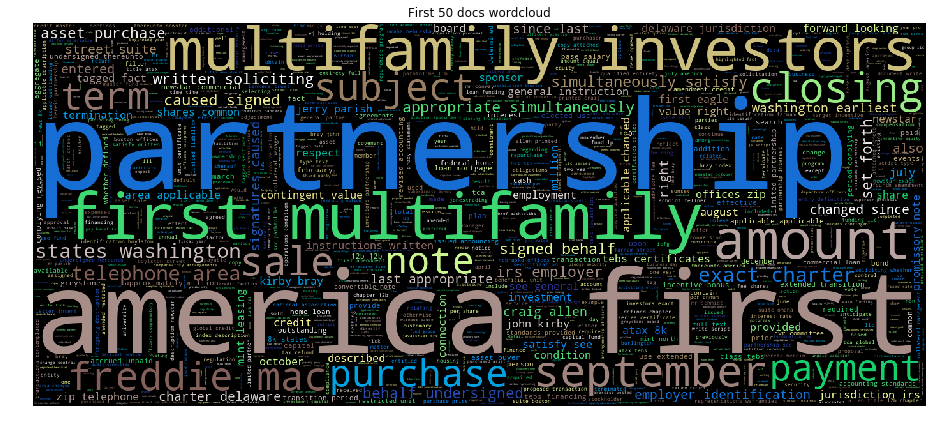

In [96]:
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

st_words = set(stop_words)
#enhancing stopword by removing frequent words
st_words.update(frequent_words)
#st_words.update([s.lower() for s in mentions_keys])

wc = WordCloud(height=600,repeat=False,width=1400,max_words=1000,stopwords=st_words,colormap='terrain',mode='RGBA').generate(' '.join(combined['form_text'][0:50].dropna().astype(str)))
plt.figure(figsize = (16,16))
plt.imshow(wc)
plt.title('First 50 docs wordcloud')
plt.axis('off')
plt.show()

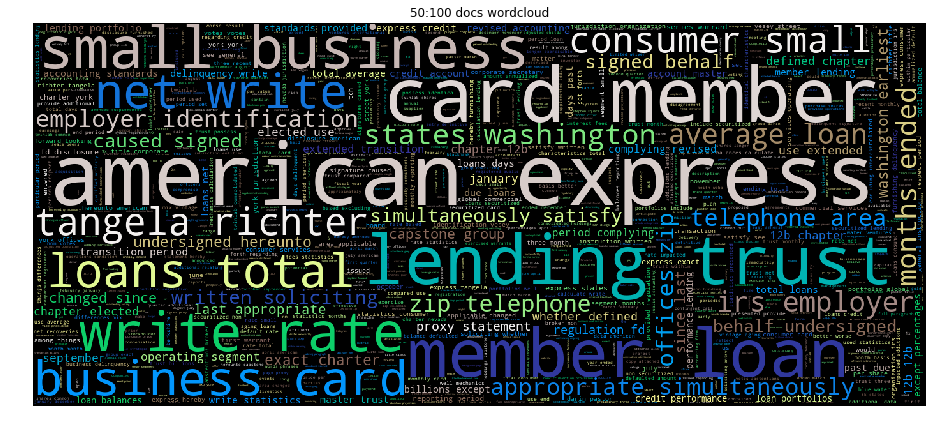

In [97]:
wc = WordCloud(height=600,repeat=False,width=1400,max_words=1000,stopwords=st_words,colormap='terrain',mode='RGBA').generate(' '.join(combined['form_text'][50:100].dropna().astype(str)))
plt.figure(figsize = (16,16))
plt.imshow(wc)
plt.title('50:100 docs wordcloud')
plt.axis('off')
plt.show()

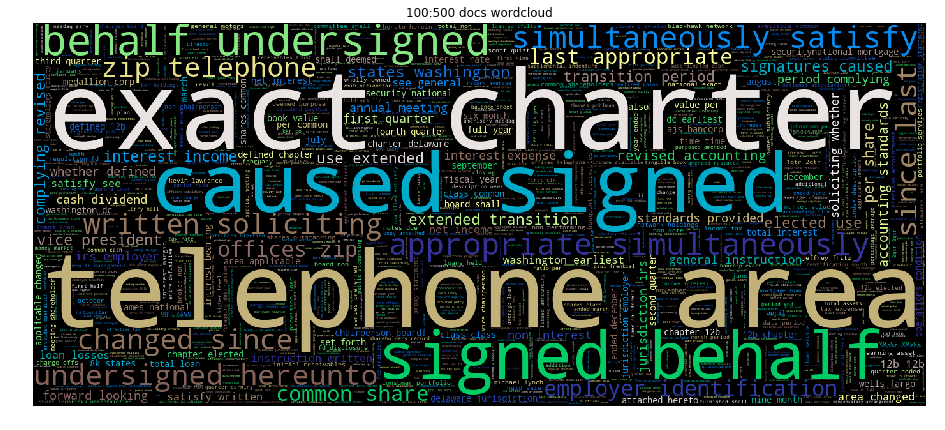

In [99]:
wc = WordCloud(height=600,repeat=False,width=1400,max_words=1000,stopwords=st_words,colormap='terrain',mode='RGBA').generate(' '.join(combined['form_text'][100:500].dropna().astype(str)))
plt.figure(figsize = (16,16))
plt.imshow(wc)
plt.title('100:500 docs wordcloud')
plt.axis('off')
plt.show()

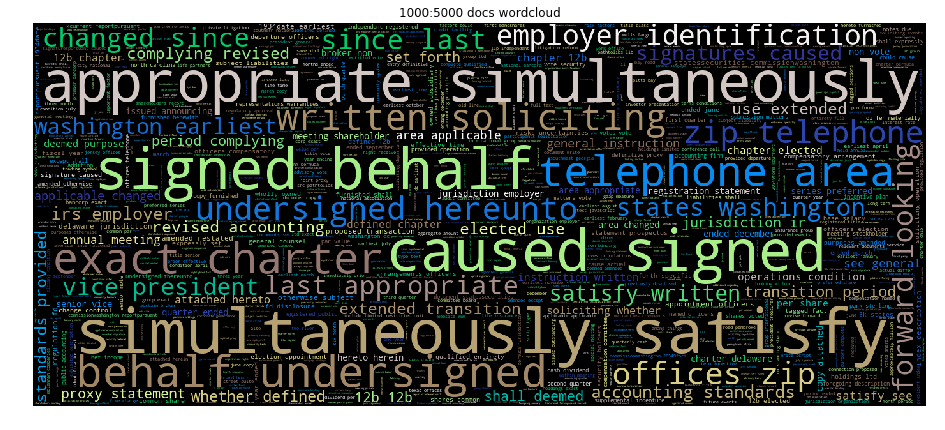

In [100]:
wc = WordCloud(height=600,repeat=False,width=1400,max_words=1000,stopwords=st_words,colormap='terrain',mode='RGBA').generate(' '.join(combined['form_text'][1000:5000].dropna().astype(str)))
plt.figure(figsize = (16,16))
plt.imshow(wc)
plt.title('1000:5000 docs wordcloud')
plt.axis('off')
plt.show()